In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
df=pd.read_csv('LoanStats_2017Q2.csv')

In [111]:
risk =['Late (16-30 days)','Late (31-120 days)','Charged Off','In Grace Period']

no_risk =['Current','Fully Paid']

def binary_maker(x):
    if x in risk:
        return 0
    else:
        return 1
    
df['loan_status']=df['loan_status'].apply(lambda x:binary_maker(x))    

In [112]:
x = df['loan_status']
x.value_counts()

1    103746
0      1705
Name: loan_status, dtype: int64

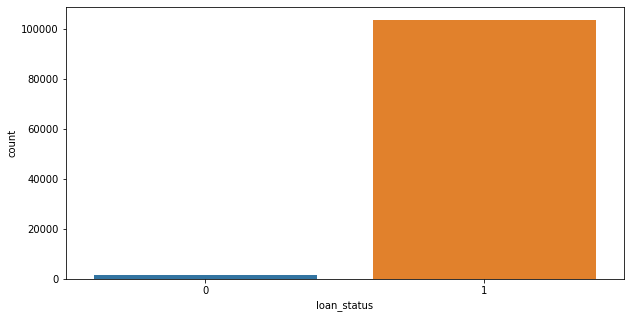

In [113]:
plt.figure(figsize=(10,5))


sns.countplot(x)



In [114]:
#filling certain columns that i think are NA due to not having a result. will sort this further down
df[['mths_since_recent_bc_dlq','mths_since_last_major_derog','mths_since_recent_revol_delinq','mths_since_last_delinq']] = df[['mths_since_recent_bc_dlq','mths_since_last_major_derog','mths_since_recent_revol_delinq','mths_since_last_delinq']].fillna(-1)


In [115]:
#setting max view and looking at dataframe
pd.set_option('display.max_columns', None)


In [116]:
#creating a mask to find percents nan over 60 percent
mask = df.columns[((df.isnull().sum()/105451)*100>=60)]
df[mask].head()

,id,member_id,url,desc,mths_since_last_record,annual_inc_joint,dti_joint,verification_status_joint,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
#dropping the NaN columns over 60 percent
df.drop(mask,axis=1,inplace=True)

In [118]:
nulls = df.columns[df.isnull().any()]

df[nulls].head(5)

,emp_title,emp_length,dti,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,mths_since_rcnt_il,il_util,all_util,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mths_since_recent_bc,mths_since_recent_inq,num_tl_120dpd_2m,percent_bc_gt_75
0,teacher,10.0,25.61,105.80%,Aug-17,Sep-17,Aug-17,26.0,69.0,94.0,26051.0,94.0,96.1,26.0,2.0,8.0,0.0,100.0
1,Registered Nurse,9.0,31.58,86.70%,Aug-17,Sep-17,Aug-17,13.0,57.0,71.0,5855.0,1421.0,94.8,118.0,21.0,13.0,0.0,100.0
2,Dealer,7.0,12.19,12.40%,Aug-17,Sep-17,Aug-17,26.0,99.0,46.0,5862.0,48443.0,12.4,153.0,33.0,22.0,0.0,60.0
3,QA Manager,1.0,31.39,98%,Aug-17,Sep-17,Aug-17,13.0,51.0,98.0,112860.0,10514.0,100.0,46.0,8.0,0.0,NaN,100.0
4,Physician Assistant,0.0,18.34,48.60%,Aug-17,Sep-17,Aug-17,10.0,58.0,56.0,21193.0,9527.0,49.6,132.0,67.0,3.0,0.0,28.6


In [119]:
#these columns represent too much work or not enough information. Emp title would be very useful but would take a long time to process.
#may come back for this one. 
df.drop(['emp_title','out_prncp_inv', 'total_pymnt_inv','last_pymnt_amnt','last_credit_pull_d'],inplace=True,axis=1)

In [120]:
#I'm assuming that for all people who do not have an employee length that they are unemployed.
df['emp_length'].fillna(value=-1,inplace=True)


# i am sorting by arbitrary employment lengths
def clean_up(x):
    if x < 0:
        return 0
    elif x <=1:
        return 1
    elif x<=5:
        return 2
    else:
        return 3
    
# this function returns 0 for unemployed, 1 for 0-1 years 2 for 1-5 and 3 for 5+ years employment.

df['emp_length'] = df['emp_length'].apply(lambda x: clean_up(x)).astype('category')


In [122]:
# I am assuming the NaN's in this column are representitive of not having delinq.
# before filling, the mean was roughly 35 for all columns so i have split the results around 35. 
def clean_up_2(x):
    if x <0:
        return 0
    
    elif x<35:
        return 2
    else:
        return 1
change_list = ['mths_since_last_delinq','mths_since_last_major_derog','mths_since_recent_revol_delinq','mths_since_recent_bc_dlq']

for col in change_list:
    df[col] = df[col].apply(lambda x: clean_up_2(x)).astype('category')

In [123]:


def clean_3(x):
    if x is np.NaN:
        return 0
    else:
        return 1


cln_list = ['last_pymnt_d','next_pymnt_d']

for col in cln_list:
    df[col] = df[col].apply(lambda x: clean_3(x))

In [124]:
df['recovery'] = np.where((df.recoveries != 0.00), 1, 0)

In [125]:
#dropping some more useless lines
df.drop(['issue_d','title','zip_code','earliest_cr_line','addr_state','funded_amnt'
         'pymnt_plan','policy_code','collection_recovery_fee','recoveries'],inplace=True,axis=1)

In [127]:
import re


def sub(text):
    text=str(text)
    x=re.sub(r'%?','',text)
    return x



df['int_rate']= df['int_rate'].apply(lambda x: sub(x))

df['int_rate']=df['int_rate'].astype('float')

df['int_rate']=df['int_rate']/100

df['revol_util']= df['revol_util'].apply(lambda x: sub(x))

df['revol_util']=df['revol_util'].astype('float')


In [128]:
nulls = df.columns[df.isnull().any()]

df[nulls].isnull().sum()


dti                  75
revol_util           75
il_util           13380
all_util             13
avg_cur_bal           2
bc_open_to_buy     1143
bc_util            1191
dtype: int64

In [129]:
nulls = df.columns[df.isnull().any()]

df[nulls].isnull().sum()



dti                  75
revol_util           75
il_util           13380
all_util             13
avg_cur_bal           2
bc_open_to_buy     1143
bc_util            1191
dtype: int64

In [131]:
# filling all values with 0 at the moment
df[nulls]=df[nulls].fillna(df[nulls].mean())

In [132]:
y = df['loan_status']

X=df.drop('loan_status',axis=1)



X=pd.get_dummies(X)



In [133]:
X.shape

(105451, 156)

In [134]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,recall_score,precision_score


X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=1)



In [135]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [136]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,stratify=y_train,test_size=0.2)


In [137]:
rus = RandomUnderSampler()
ros = RandomOverSampler()

#sampling_strategy={'Current':2000,} 
#X_train,y_train=rus.fit_sample(X_train,y_train)
X_train,y_train = ros.fit_sample(X_train,y_train)

In [138]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,Flatten,Dropout,MaxPool2D,BatchNormalization
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [139]:
model = Sequential()

model.add(Dense(1000,activation='relu',input_dim=156))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(500,activation='relu'))
model.add(Dense(2000,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1000,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [140]:
from keras.optimizers import Adam

In [141]:
BS = 64
EPOCH=10

In [142]:
adam=Adam()

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [143]:
y_train=pd.get_dummies(y_train)

In [144]:
y_val=pd.get_dummies(y_val)

In [145]:
checkpoint=ModelCheckpoint('weights.{epoch:02d}-{val_accuracy:.2f}.hdf5',monitor='val_accuracy',
                           verbose=1,save_best_only=True)

early_stop=EarlyStopping(monitor='val_accuracy', min_delta=0, patience=4, verbose=0,
                         mode='auto', baseline=None, restore_best_weights=False)

      

model.fit(X_train,y_train,verbose=2,epochs=EPOCH,batch_size=BS,validation_data=[X_val,y_val],
          callbacks=[early_stop,checkpoint])

Train on 132794 samples, validate on 16872 samples
Epoch 1/10
 - 229s - loss: 0.6449 - accuracy: 0.6386 - val_loss: 0.5434 - val_accuracy: 0.6837

Epoch 00001: val_accuracy improved from -inf to 0.68368, saving model to weights.01-0.68.hdf5
Epoch 2/10
 - 201s - loss: 0.5623 - accuracy: 0.6984 - val_loss: 0.4427 - val_accuracy: 0.7972

Epoch 00002: val_accuracy improved from 0.68368 to 0.79718, saving model to weights.02-0.80.hdf5
Epoch 3/10
 - 200s - loss: 0.5203 - accuracy: 0.7284 - val_loss: 0.3964 - val_accuracy: 0.8192

Epoch 00003: val_accuracy improved from 0.79718 to 0.81917, saving model to weights.03-0.82.hdf5
Epoch 4/10
 - 202s - loss: 0.4711 - accuracy: 0.7647 - val_loss: 0.3280 - val_accuracy: 0.8306

Epoch 00004: val_accuracy improved from 0.81917 to 0.83061, saving model to weights.04-0.83.hdf5
Epoch 5/10
 - 203s - loss: 0.4125 - accuracy: 0.8052 - val_loss: 0.5143 - val_accuracy: 0.7524

Epoch 00005: val_accuracy did not improve from 0.83061
Epoch 6/10
 - 199s - loss: 0.

In [37]:
import keras as K

In [43]:
model = K.models.load_model('weights.20-0.97.hdf5')

In [44]:
preds_train=model.predict(X_test)

In [45]:
y_test=pd.get_dummies(y_test)

In [46]:


confusion_matrix(y_test.values.argmax(axis=1),preds_train.argmax(axis=1))

array([[   54,   287],
       [ 1041, 19709]], dtype=int64)

In [99]:

preds=model.predict_proba(X_test)

In [104]:
def predict(array):
    new_preds = np.zeros(len(array[:,1]))
    for i in range(len(array[:,1])):
        if array[i,1] >0.999:
            new_preds[i] = 1
        else:
            new_preds[i] =0
    return new_preds
    


In [105]:
new_pred = predict(preds)

In [106]:
confusion_matrix(y_test.values.argmax(axis=1),new_pred)

array([[  244,    97],
       [ 9433, 11317]], dtype=int64)

In [108]:
recall_score(y_test.values.argmax(axis=1),new_pred,average=None)

array([0.71554252, 0.54539759])